# Assignment 1: Car Listings Data

Welcome to your first required assignment. This notebook will guide you through exploring, cleaning, and transforming a real dataset of car listings from Craigslist.  

Please read these instructions carefully before you begin:

- **AI use**: You may use AI to *ask questions* if you are stuck or need clarification. However, do not use AI code-completion or copy/paste code from AI. The purpose of this assignment is for you to gain fluency with Pandas by writing code yourself.  
- **Questions**: Look for cells marked with `Q:`. These contain questions you must answer, either in code or in Markdown.  
- **Markdown**: Use Markdown cells to explain your results, interpret outputs, and format your answers neatly. Clear communication is part of the assignment.  
- **Output**: Ensure your notebook runs top-to-bottom without errors. Remove stray debug code before submitting.  

By the end of this assignment, you should feel more comfortable working with Pandas and preparing real-world data for analysis. 

When you've finished your work on this notebook, restart the kernel, clear the outputs, and run all cells to ensure everything works as expected. Then commit and push your changes to GitHub. Comment out any cells that are printing large outputs or dataframes.

I've placed blank code cells where you need to write code, but don't feel like you have to do all the work for a given part in a single cell. I like to have each step in its own cell, so I can see the output and check my work as I go. You don't need to write a ton for these answers, fyi.


In [495]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [496]:
listings = pd.read_csv("car_listings.zip")

In [497]:

# Let's handle some column conversions to make it easier to work with this data
listings["time_posted"] = pd.to_datetime(listings["time_posted"], errors="coerce")

# These can have missing values, so cast to pandas' nullable integer type
listings["year"] = pd.to_numeric(listings["year"], errors="coerce").astype("Int64")
listings["odometer"] = pd.to_numeric(listings["odometer"], errors="coerce").astype("Int64")
listings["post_id"] = pd.to_numeric(listings["post_id"], errors="coerce").astype("Int64")
listings["num_images"] = pd.to_numeric(listings["num_images"], errors="coerce").astype("Int64")

listings["price"] = pd.to_numeric(listings["price"], errors="coerce")
listings["latitude"] = pd.to_numeric(listings["latitude"], errors="coerce")
listings["longitude"] = pd.to_numeric(listings["longitude"], errors="coerce")



---

### Part 1: Inspect the Data
- Print dataset shape, data types, summary statistics, and missing values.  


In [498]:
# Display first 5 row
listings.head()

,url,location,post_id,time_posted,name,make,model,year,odometer,title,...,type,transmission,condition,vin,price,posting_body_text,title_text,num_images,latitude,longitude
0,https://fargo.craigslist.org/cto/d/west-fargo-...,fargo,7787882335,2024-09-25 09:35:39+00:00,chevy equinox lt awd,chevrolet,equinox,2013,160000,clean,...,SUV,automatic,NaN,NaN,6000.0,\n\nQR Code Link to This Post\n\n\n14 Equinox ...,14 Chevy Equinox,11,46.890700,-96.925800
1,https://chicago.craigslist.org/nwc/cto/d/des-p...,chicago,7789338453,2024-09-30 12:25:28+00:00,ford transit,ford,transit 250 van,2019,93000,clean,...,van,automatic,good,NaN,21900.0,\n\nQR Code Link to This Post\n\n\n2019 Ford C...,2019 FORD TRANSIT 250 VAN,14,42.023580,-87.902577
2,https://chicago.craigslist.org/nch/cto/d/evans...,chicago,7789384937,2024-09-30 14:33:58+00:00,ford escape titanium,ford,escape,2014,122000,clean,...,SUV,automatic,excellent,NaN,6250.0,\n\nQR Code Link to This Post\n\n\n2014 Ford E...,2014 Ford Escape (Excellent condition) Titaniu...,12,42.052098,-87.686005
3,https://chicago.craigslist.org/sox/cto/d/chica...,chicago,7789321782,2024-09-30 11:42:21+00:00,nissan altima 2.5 s,nissan,altima,2015,145000,clean,...,sedan,automatic,excellent,NaN,5200.0,\n\nQR Code Link to This Post\n\n\nHeres is my...,"2015 Nissan Altima S, 145k, *Remote Start*, 4 ...",11,41.781400,-87.770500
4,https://chicago.craigslist.org/nwi/cto/d/scher...,chicago,7789402919,2024-09-30 15:25:31+00:00,honda odyssey touring,honda,odyssey,2007,230000,clean,...,minivan,automatic,excellent,NaN,3500.0,\n\nQR Code Link to This Post\n\n\nVery Nice V...,2007 Honda Odyssey Touring,10,41.492200,-87.460500


In [499]:
# Summary of DataFrame
listings.info()
#list all columns names
#print(list(listings.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266817 entries, 0 to 266816
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   url                266817 non-null  object             
 1   location           266817 non-null  object             
 2   post_id            266817 non-null  Int64              
 3   time_posted        263017 non-null  datetime64[ns, UTC]
 4   name               262666 non-null  object             
 5   make               257869 non-null  object             
 6   model              243707 non-null  object             
 7   year               262668 non-null  Int64              
 8   odometer           262632 non-null  Int64              
 9   title              262670 non-null  object             
 10  paint              193660 non-null  object             
 11  drive              198520 non-null  object             
 12  cylinders          207353 non-

In [500]:
# Show missing values in each column
listings.isnull().sum()


url                       0
location                  0
post_id                   0
time_posted            3800
name                   4151
make                   8948
model                 23110
year                   4149
odometer               4185
title                  4147
paint                 73157
drive                 68297
cylinders             59464
fuel                   4149
type                  48205
transmission           4146
condition             46856
vin                  229840
price                 11163
posting_body_text      3800
title_text             3800
num_images            10861
latitude              11075
longitude             11075
dtype: int64

In [501]:
#Summary statistics for numerical columns 
listings.describe()

,post_id,year,odometer,price,num_images,latitude,longitude
count,266817.0,262668.0,262632.0,255654.000000,255956.0,255742.000000,255742.000000
mean,7769245241.054832,2009.254321,152428.71275,9620.251469,11.302009,42.393583,-90.338377
std,67261870.479922,6.304723,165613.707579,10345.793452,5.967262,3.021849,5.321630
min,7525960928.0,1990.0,0.0,500.000000,1.0,-72.895538,-155.901311
25%,7718963797.0,2005.0,100000.0,3671.250000,7.0,41.602800,-93.303637
50%,7772656829.0,2010.0,142796.0,6000.000000,10.0,42.113900,-89.452800
75%,7826911559.0,2014.0,185000.0,11500.000000,15.0,44.674900,-87.929764
max,7878823161.0,2023.0,10000000.0,100000.000000,24.0,76.785337,0.000000


In [502]:
# Show the number of rows and columns
listings.shape

(266817, 24)

Q: What does `errors="coerce"` do in the functions above?  

A:  Errors="coerce" in the function above is used to convert any invalide data into NaN. 

Q: How many rows and columns are in this dataset?  

A: Q2: There are  rows 266817 and 24 columns.

---

Q: Which columns have the most missing values?  

A: Q3:  the columns with the most missing values is the vin columns with 229840 missing values. 

---

Q: What data type is used for the `time_posted` column? Why do you think that matters for analysis?  

A: The data type used for the time_posted column is datetime64[ns, UTC] which is dates+ Time values because it keeps the date time format consistent.

---

Q: Looking at the summary statistics (`.describe()`), what are the minimum and maximum values for `price` and `odometer`? Do they seem reasonable?  

A: The minimum and maximum values for odometer are repectively: 0.0 and 10000000.0
The minimum and maximum values for price are repectively: 500.0 and 	100000.0
Those two values do not seem reasonable because listening car with a 0.0 mile with price of $500.0 that means new car and 10000000miles no car can run thst much. 

---

### Part 2: Cleaning
- Drop duplicate rows (`post_id` is unique).  
- Standardize string columns to lowercase.  
- Create new variables:
  - `car_age = 2025 - year`  
  - `high_mileage = odometer > 150000`  
  - `price_per_mile = price / odometer`  


In [503]:
#Drop duplicate rows (`post_id` is unique). 
listings.drop_duplicates(subset='post_id',keep='first')


,url,location,post_id,time_posted,name,make,model,year,odometer,title,...,type,transmission,condition,vin,price,posting_body_text,title_text,num_images,latitude,longitude
0,https://fargo.craigslist.org/cto/d/west-fargo-...,fargo,7787882335,2024-09-25 09:35:39+00:00,chevy equinox lt awd,chevrolet,equinox,2013,160000,clean,...,SUV,automatic,NaN,NaN,6000.0,\n\nQR Code Link to This Post\n\n\n14 Equinox ...,14 Chevy Equinox,11,46.890700,-96.925800
1,https://chicago.craigslist.org/nwc/cto/d/des-p...,chicago,7789338453,2024-09-30 12:25:28+00:00,ford transit,ford,transit 250 van,2019,93000,clean,...,van,automatic,good,NaN,21900.0,\n\nQR Code Link to This Post\n\n\n2019 Ford C...,2019 FORD TRANSIT 250 VAN,14,42.023580,-87.902577
2,https://chicago.craigslist.org/nch/cto/d/evans...,chicago,7789384937,2024-09-30 14:33:58+00:00,ford escape titanium,ford,escape,2014,122000,clean,...,SUV,automatic,excellent,NaN,6250.0,\n\nQR Code Link to This Post\n\n\n2014 Ford E...,2014 Ford Escape (Excellent condition) Titaniu...,12,42.052098,-87.686005
3,https://chicago.craigslist.org/sox/cto/d/chica...,chicago,7789321782,2024-09-30 11:42:21+00:00,nissan altima 2.5 s,nissan,altima,2015,145000,clean,...,sedan,automatic,excellent,NaN,5200.0,\n\nQR Code Link to This Post\n\n\nHeres is my...,"2015 Nissan Altima S, 145k, *Remote Start*, 4 ...",11,41.781400,-87.770500
4,https://chicago.craigslist.org/nwi/cto/d/scher...,chicago,7789402919,2024-09-30 15:25:31+00:00,honda odyssey touring,honda,odyssey,2007,230000,clean,...,minivan,automatic,excellent,NaN,3500.0,\n\nQR Code Link to This Post\n\n\nVery Nice V...,2007 Honda Odyssey Touring,10,41.492200,-87.460500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266810,https://chicago.craigslist.org/chc/cto/d/evans...,chicago,7645577091,2023-07-20 13:11:03+00:00,2012 land rover range rover sport,land rover,range rover sport,2012,93235,clean,...,SUV,automatic,excellent,SALSK2D40CA742126,13500.0,\n\nQR Code Link to This Post\n\n\nRare opport...,2012 Range Rover Sport HSE LUX Black,6,42.030200,-87.686500
266811,https://chicago.craigslist.org/nwc/cto/d/verno...,chicago,7777942459,2024-08-22 14:24:46+00:00,Chevrolet Express 1500 Cargo,chevrolet,express 1500 cargo,2014,352622,missing,...,van,automatic,fair,1GCSGAFX0E1110269,1200.0,\n\nQR Code Link to This Post\n\n\nChevy expre...,2014 Chevrolet Express 1500,13,42.246220,-87.972255
266813,https://chicago.craigslist.org/chc/cto/d/frank...,chicago,7765750127,2024-07-13 07:05:20+00:00,Jeep Wrangler Unlimited,jeep,wrangler unlimited,2006,51800,clean,...,offroad,automatic,excellent,NaN,23000.0,\n\nQR Code Link to This Post\n\n\n2006 Jeep W...,2006 Jeep Wrangler Unlimited 51k miles Auto clean,23,41.509400,-87.824800
266814,https://chicago.craigslist.org/nwc/cto/d/liber...,chicago,7754969164,2024-06-08 07:08:13+00:00,Jeep Wrangler Unlimited Rubicon,jeep,wrangler unlimited,2010,124000,clean,...,NaN,automatic,good,NaN,15900.0,\n\nQR Code Link to This Post\n\n\n2010 jeep W...,2010 Jeep Wrangler Rubicon 4 Dr,19,42.281000,-87.950000


In [504]:
#Standardize string columns to lowercase.
listings.columns.str.lower()

Index(['url', 'location', 'post_id', 'time_posted', 'name', 'make', 'model',
       'year', 'odometer', 'title', 'paint', 'drive', 'cylinders', 'fuel',
       'type', 'transmission', 'condition', 'vin', 'price',
       'posting_body_text', 'title_text', 'num_images', 'latitude',
       'longitude'],
      dtype='object')

In [505]:
#create new variables:`car_age = 2025 - year`  

listings['car_year']= 2025-listings['year']

In [506]:
#reate new variables: `high_mileage = odometer > 150000`  
  
listings['high_mileage']=(listings['odometer'] > 150000)


In [507]:
#reate new variables: `price_per_mile = price / odometer` 
listings['price_per_mile']= listings['price']/listings['odometer']

In [508]:
#Check result
listings.head()

,url,location,post_id,time_posted,name,make,model,year,odometer,title,...,vin,price,posting_body_text,title_text,num_images,latitude,longitude,car_year,high_mileage,price_per_mile
0,https://fargo.craigslist.org/cto/d/west-fargo-...,fargo,7787882335,2024-09-25 09:35:39+00:00,chevy equinox lt awd,chevrolet,equinox,2013,160000,clean,...,NaN,6000.0,\n\nQR Code Link to This Post\n\n\n14 Equinox ...,14 Chevy Equinox,11,46.890700,-96.925800,12,True,0.0375
1,https://chicago.craigslist.org/nwc/cto/d/des-p...,chicago,7789338453,2024-09-30 12:25:28+00:00,ford transit,ford,transit 250 van,2019,93000,clean,...,NaN,21900.0,\n\nQR Code Link to This Post\n\n\n2019 Ford C...,2019 FORD TRANSIT 250 VAN,14,42.023580,-87.902577,6,False,0.235484
2,https://chicago.craigslist.org/nch/cto/d/evans...,chicago,7789384937,2024-09-30 14:33:58+00:00,ford escape titanium,ford,escape,2014,122000,clean,...,NaN,6250.0,\n\nQR Code Link to This Post\n\n\n2014 Ford E...,2014 Ford Escape (Excellent condition) Titaniu...,12,42.052098,-87.686005,11,False,0.05123
3,https://chicago.craigslist.org/sox/cto/d/chica...,chicago,7789321782,2024-09-30 11:42:21+00:00,nissan altima 2.5 s,nissan,altima,2015,145000,clean,...,NaN,5200.0,\n\nQR Code Link to This Post\n\n\nHeres is my...,"2015 Nissan Altima S, 145k, *Remote Start*, 4 ...",11,41.781400,-87.770500,10,False,0.035862
4,https://chicago.craigslist.org/nwi/cto/d/scher...,chicago,7789402919,2024-09-30 15:25:31+00:00,honda odyssey touring,honda,odyssey,2007,230000,clean,...,NaN,3500.0,\n\nQR Code Link to This Post\n\n\nVery Nice V...,2007 Honda Odyssey Touring,10,41.492200,-87.460500,18,True,0.015217


In [509]:
# Make with the highest **median** value price_per_mileage
listings.groupby('make')['price_per_mile'].median().sort_values().idxmax()

'lamborghini'

In [510]:
#make/model with at least 100 observations has the highest proportion of listings in this category


grouped = listings.groupby(["make", "model"]).agg(
    observ=("high_mileage", "size"),
    high_mileage_count=("high_mileage", "sum")
)
grouped["high_mileage_proportion"] = grouped["high_mileage_count"] / grouped["observ"]

filtered = grouped[grouped["observ"] >= 100].value_counts().idxmax()


Q: After standardizing the string columns (`make`, `model`, `fuel`, `drive`, etc.), why is it helpful to convert everything to lowercase?  

A: To ensure consistency in the DataFrame. 

---

Q: You created a new variable `car_age = 2025 - year`. Why might this be helpful?   

A: This is helpful because it help with handling data anlysis. 

---

Q: You created a flag `high_mileage = odometer > 150000`. What make/model with at least 100 observations has the highest proportion of listings in this category?  

A: ASK PROFESSOR

---

Q: You created a new variable `price_per_mile = price / odometer`. Which make has the highest **median** value for this new variable? Do you think this statistic is meaningful? Why or why not?  

A: 'lamborghini' it is not meaningfull because it represents an outlier.


---

### Part 3: Exploration

For this next section, cut down the data to just Ford F-150s. Call this data frame `ford_150s`. Then:
- Fill missing values:
  - Numeric (`odometer`, `year`, `price`) with median.  
  - Categorical (`fuel`, `drive`, `transmission`, `paint`) with the most common value (the "mode").  
- Filter listings priced between $5,000 and $50,000.  
- Compute average price by location.  
- Count monthly listings using `time_posted`.  


In [511]:
# cut down the data to just Ford F-150s. Call this data frame `ford_150s.
ford_150s = listings.loc[listings['model']=='f150'].copy()

In [512]:
# check number of rows and columns 
ford_150s.shape

(7934, 27)

In [513]:
ford_150s['year'] = ford_150s['year'].fillna(ford_150s['year'].median())

In [514]:
#Fill missing values in price column with median
ford_150s['price'] = ford_150s['price'].fillna(ford_150s['price'].median())

In [515]:
#Fill missing values in odometer column with median
ford_150s['odometer'] = ford_150s['odometer'].fillna(ford_150s['odometer'].median())

In [516]:
#Fill missing values in fuel column with mode
ford_150s['fuel'] = ford_150s['fuel'].fillna(ford_150s['fuel'].mode())

In [517]:
#Fill missing values in drive column with mode
ford_150s['drive'] = ford_150s['drive'].fillna(ford_150s['drive'].mode())

In [518]:
#Fill missing values in paint column with mode
ford_150s['paint'] = ford_150s['paint'].fillna(ford_150s['paint'].mode())

In [519]:
# check result 
ford_150s.isnull().sum()

url                     0
location                0
post_id                 0
time_posted             0
name                    4
make                    0
model                   0
year                    0
odometer                0
title                   4
paint                1816
drive                1305
cylinders            1312
fuel                    4
type                  810
transmission            4
condition            1115
vin                  7005
price                   0
posting_body_text       0
title_text              0
num_images            177
latitude              195
longitude             195
car_year                4
high_mileage            9
price_per_mile          9
dtype: int64

In [520]:
# Filter listings price between $5,00 and $50,000
ford_150s[(ford_150s['price']>=5000)&(ford_150s['price']<=50000)]

,url,location,post_id,time_posted,name,make,model,year,odometer,title,...,vin,price,posting_body_text,title_text,num_images,latitude,longitude,car_year,high_mileage,price_per_mile
68,https://appleton.craigslist.org/cto/d/neenah-2...,appleton,7789188615,2024-09-29 20:27:41+00:00,Ford F-150,ford,f150,2016,115000,clean,...,1FTEW1EG6GKE09652,25000.0,\n\nQR Code Link to This Post\n\n\nUp for sale...,2016 Ford F-150 super-crew 4x4,24,44.181100,-88.479200,9,False,0.217391
111,https://chicago.craigslist.org/nch/cto/d/wilme...,chicago,7781853684,2024-09-04 16:41:32+00:00,ford f-150 XL 4x4,ford,f150,2014,55000,clean,...,1FTNF1EFXEKD32949,10900.0,\n\nQR Code Link to This Post\n\n\n14 Ford F-1...,2014 Ford F-150 4x4 long Bed original 55k mile...,13,42.062730,-87.751856,11,False,0.198182
129,https://milwaukee.craigslist.org/cto/d/new-ber...,milwaukee,7790067892,2024-10-02 20:31:32+00:00,ford f-150,ford,f150,2008,138500,clean,...,NaN,7500.0,\n\nQR Code Link to This Post\n\n\nlocking Lak...,2008 Ford F150 XLT 4x4,4,42.982200,-88.094600,17,False,0.054152
151,https://stlouis.craigslist.org/cto/d/greenvill...,stlouis,7769529379,2024-07-25 20:58:03+00:00,ford f150 lariat 4x4,ford,f150,2012,146500,clean,...,NaN,16500.0,\n\nQR Code Link to This Post\n\n\nExcellent C...,2012 Ford F-150 Lariat Supercrew 4x4 Excellent,20,38.893300,-89.405200,13,False,0.112628
186,https://minneapolis.craigslist.org/wsh/cto/d/s...,minneapolis,7878590788,2025-09-02 18:11:34+00:00,ford f-150,ford,f150,2008,202400,lien,...,NaN,6500.0,\n\nQR Code Link to This Post\n\n\n2008 Ford F...,2008 Ford F150,6,45.133100,-92.686500,17,True,0.032115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264994,https://stlouis.craigslist.org/cto/d/bourbon-2...,stlouis,7666602414,2023-09-16 09:35:47+00:00,2014 2014 ford f150,ford,f150,2014,158000,clean,...,NaN,20000.0,\n\nQR Code Link to This Post\n\n\nVery nice 2...,2014 Ford F150 King Ranch 4x4 SuperCrew,10,38.089598,-91.156194,11,True,0.126582
264996,https://kansascity.craigslist.org/cto/d/shawne...,kansascity,7710442342,2024-01-23 12:21:37+00:00,2018 ford f150 lariat,ford,f150,2018,144500,clean,...,NaN,27000.0,\n\nQR Code Link to This Post\n\n\n2018 Ford F...,2018 FORD F150,9,39.041700,-94.720200,7,False,0.186851
265000,https://chicago.craigslist.org/nwc/cto/d/strea...,chicago,7649398174,2023-07-31 07:51:55+00:00,2006 ford f150 super crew cab,ford,f150,2006,160000,clean,...,NaN,6000.0,\n\nQR Code Link to This Post\n\n\n2006 ford f...,2006 ford f150 super crew cab 4x4,<NA>,42.013336,-88.138676,19,True,0.0375
265002,https://chicago.craigslist.org/wcl/cto/d/weste...,chicago,7763273681,2024-07-05 09:31:59+00:00,ford f150 lariat 2.7 L Ecoboost,ford,f150,2015,107300,clean,...,NaN,23000.0,\n\nQR Code Link to This Post\n\n\nDescription...,2015 Ford F150 Lariat 2.7L ecoboost,8,41.804900,-87.899500,10,False,0.214352


In [521]:
#Check number of rows remain filtering to prices between $5,000 and $50,000
ford_150s.shape

(7934, 27)

In [527]:
monthly_counts = ford_150s.resample('M', on='time_posted').size()
print(monthly_counts)


time_posted
2023-06-30 00:00:00+00:00     10
2023-07-31 00:00:00+00:00    218
2023-08-31 00:00:00+00:00    265
2023-09-30 00:00:00+00:00    210
2023-10-31 00:00:00+00:00    205
2023-11-30 00:00:00+00:00    216
2023-12-31 00:00:00+00:00    132
2024-01-31 00:00:00+00:00    158
2024-02-29 00:00:00+00:00    235
2024-03-31 00:00:00+00:00    305
2024-04-30 00:00:00+00:00    343
2024-05-31 00:00:00+00:00    387
2024-06-30 00:00:00+00:00    592
2024-07-31 00:00:00+00:00    357
2024-08-31 00:00:00+00:00    432
2024-09-30 00:00:00+00:00    375
2024-10-31 00:00:00+00:00    435
2024-11-30 00:00:00+00:00    339
2024-12-31 00:00:00+00:00    267
2025-01-31 00:00:00+00:00    284
2025-02-28 00:00:00+00:00    261
2025-03-31 00:00:00+00:00    333
2025-04-30 00:00:00+00:00    313
2025-05-31 00:00:00+00:00    351
2025-06-30 00:00:00+00:00    298
2025-07-31 00:00:00+00:00    278
2025-08-31 00:00:00+00:00    312
2025-09-30 00:00:00+00:00     23
Freq: M, dtype: int64


In [523]:
## Define a function to map months to seasons

def get_season(month):
    if month in [1,2,12]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"


In [524]:
#Apply to the monthly_counts index
monthly_counts = monthly_counts.to_frame("count")
monthly_counts["season"] = monthly_counts.index.month.map(get_season)


# group by seasons 
seasons_counts = monthly_counts.groupby("season")["count"].sum()
print(seasons_counts)

season
Fall      1803
Spring    2032
Summer    2762
Winter    1337
Name: count, dtype: int64


In [525]:
# Compute average price by location 
ford_150s.groupby('location')['price'].mean()

#Location with highest avg price 
ford_150s.groupby('location')['price'].mean().idxmax()


'duluth'

Q: After filtering to Ford F-150s, how many rows remain in your dataset?  

A: There are 7934 rows remain.

---

Q: When filling missing numeric values with the median, why might that be a better choice than the mean for this dataset?  

A: It is better to use the median instead of mean because there are some outliers that might skew out data.

---

Q: When filling missing categorical values with the mode, what potential problems could arise?  

A:  When filling missing categorical values with the mode, may cause problems cause of over- representation of the value that occurs the most.

---

Q: After filtering to prices between $5,000 and $50,000, what is the new row count?  

A: 7934

---

Q: Which location has the highest average price for Ford F-150s? Does that result surprise you?  

A: location with the highest average price for Ford F-150s is 'duluth'. NO, it is not suprising because it is hight demande area for snow, outdoor work. 

---

Q: Looking at the monthly counts of listings, do you notice any seasonal patterns or anomalies?  

A: I notice seasonal patern meaning more listings in summer. 



---
### Part 4: Visualization

We will cover visualization next week, so here's some code that makes plots for you based on the cleaned data you made in the previous section. 

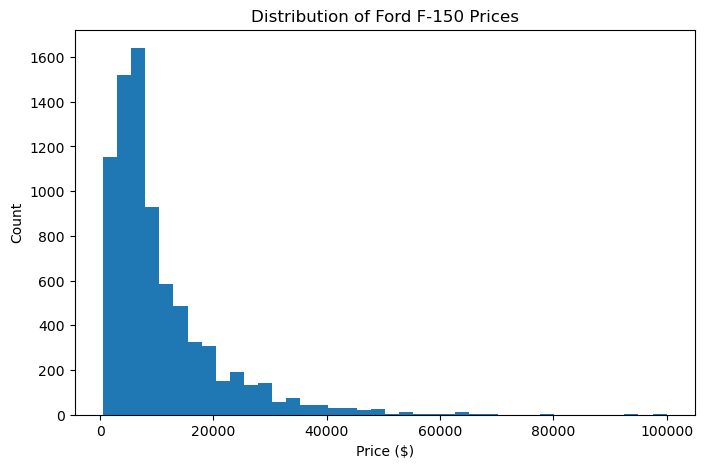

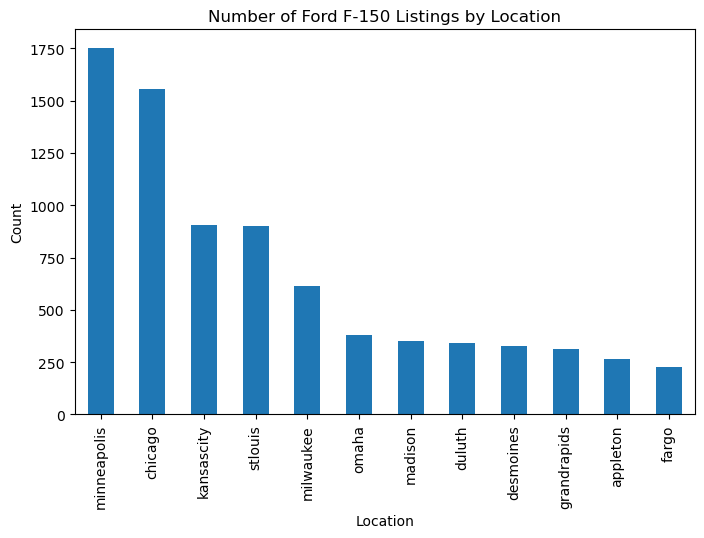

<Figure size 1000x600 with 0 Axes>

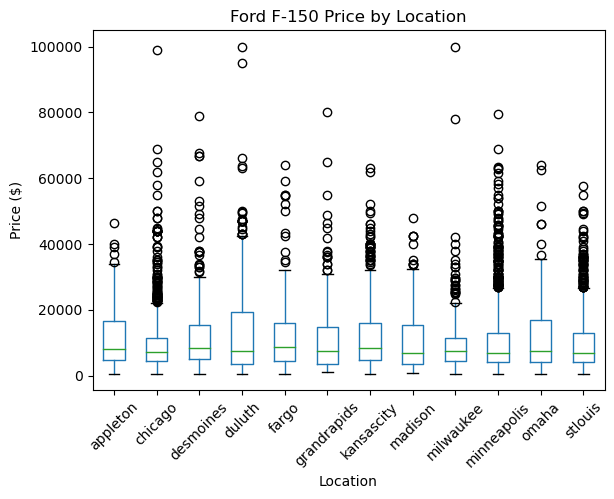

In [526]:
# Histogram of prices
ford_150s["price"].plot.hist(bins=40, figsize=(8,5))
plt.title("Distribution of Ford F-150 Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

# Bar chart of listings by location
ford_150s["location"].value_counts().plot.bar(figsize=(8,5))
plt.title("Number of Ford F-150 Listings by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

# Boxplot of price by location
plt.figure(figsize=(10,6))
ford_150s.boxplot(column="price", by="location", grid=False, rot=45)
plt.title("Ford F-150 Price by Location")
plt.suptitle("")  # Remove that default subtitle
plt.xlabel("Location")
plt.ylabel("Price ($)")
plt.show()



Q: Looking at the histogram, what do you notice about the distribution of prices? Are there any unusual features?  

A: The distribution is skewed to the right.

---

Q: Do the counts of listings by location make sense to you? 

A: Yes, it make sense because the big city like minnneapolis, chicago etc... has the high population than others on the graph. 

---

Q: Do the plots help you understand the data differently than the summary statistics alone? Explain briefly.  

A: yes, it does. It give more details about the data such as the skewness , outliers that can not be seen. 

--- 

Q: What do you notice about the distribution of prices by location?
A: I notice that each location has skwed data and the median price look similar for all of them.

---

Q: Which location shows the widest spread of prices? What might that indicate about the market in that city?  

A: Chicago has the widest spred of price. The price in that city might be inflated 

---

Q: Do you see any extreme outliers in the boxplots? How might those affect your analysis?  

A: Yes, the extreme outliers will move the mean price high. so, relying on the mean will be misleading.


---

### Part 5: Reflection

- Write a short reflection in Markdown:
  - What was most challenging about cleaning this dataset?  
  - Did anything surprise you?  
  ----
  The most challenging about cleaning this dataset was dealing with the duplicates and filter the listings dataset to just F-150 dataframe. My grapghs did not show up it was blank. It was due to the fact that I removed valids records. What surprised me the most was the fact that summary statists could be misleading compare to the grapghs. It was the case with Duluth with a high average prices due to extreme outliers. 


